In [ ]:
import pandas as pd
import string, re

In [ ]:
from google.colab import drive

In [ ]:
#akses drive
drive.mount('/content/drive')

pth = '/content/drive/MyDrive/MSIB/Final Project/'

Mounted at /content/drive


###Intro

In [ ]:
df = pd.read_csv(pth+'Employee.csv')
print(df.shape)
df.head()

(4653, 9)


,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,Bachelors,2017,Bangalore,3,34,Male,No,0,0
1,Bachelors,2013,Pune,1,28,Female,No,3,1
2,Bachelors,2014,New Delhi,3,38,Female,No,2,0
3,Masters,2016,Bangalore,3,27,Male,No,5,1
4,Masters,2017,Pune,3,24,Male,Yes,2,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4653 entries, 0 to 4652
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Education                  4653 non-null   object
 1   JoiningYear                4653 non-null   int64 
 2   City                       4653 non-null   object
 3   PaymentTier                4653 non-null   int64 
 4   Age                        4653 non-null   int64 
 5   Gender                     4653 non-null   object
 6   EverBenched                4653 non-null   object
 7   ExperienceInCurrentDomain  4653 non-null   int64 
 8   LeaveOrNot                 4653 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 327.3+ KB


In [ ]:
df.describe()

,JoiningYear,PaymentTier,Age,ExperienceInCurrentDomain,LeaveOrNot
count,4653.000000,4653.000000,4653.000000,4653.000000,4653.000000
mean,2015.062970,2.698259,29.393295,2.905652,0.343864
std,1.863377,0.561435,4.826087,1.558240,0.475047
min,2012.000000,1.000000,22.000000,0.000000,0.000000
25%,2013.000000,3.000000,26.000000,2.000000,0.000000
50%,2015.000000,3.000000,28.000000,3.000000,0.000000
75%,2017.000000,3.000000,32.000000,4.000000,1.000000
max,2018.000000,3.000000,41.000000,7.000000,1.000000


###Missing value

In [ ]:
print(df.isnull().sum())

Education                    0
JoiningYear                  0
City                         0
PaymentTier                  0
Age                          0
Gender                       0
EverBenched                  0
ExperienceInCurrentDomain    0
LeaveOrNot                   0
dtype: int64


###Outliers

<Axes: xlabel='Age'>

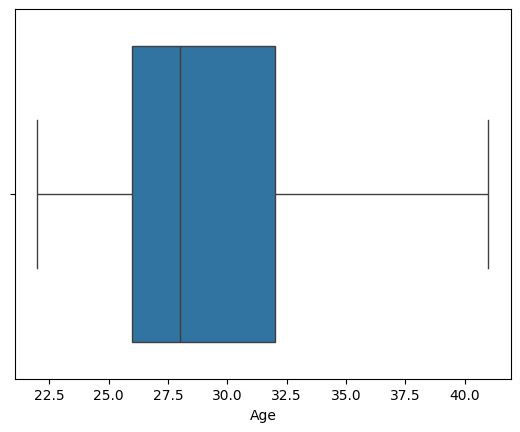

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.boxplot(x=df['Age'])

In [ ]:
# Pembagian data dari kolom "LeaveOrNot"

X = df.drop(columns="LeaveOrNot")
y = df['LeaveOrNot']

In [ ]:
from sklearn.preprocessing import OneHotEncoder

# Inisialisasi OneHotEncoder
encoder = OneHotEncoder(sparse=False)

# Mengubah kolom kategori menjadi One Hot Encoding
encoded_features = encoder.fit_transform(X)

# Membuat DataFrame dari hasil One Hot Encoding
encoded_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out())

print("\nDataFrame setelah One Hot Encoding:\n", encoded_df)


DataFrame setelah One Hot Encoding:
       Education_Bachelors  Education_Masters  Education_PHD  JoiningYear_2012  \
0                     1.0                0.0            0.0               0.0   
1                     1.0                0.0            0.0               0.0   
2                     1.0                0.0            0.0               0.0   
3                     0.0                1.0            0.0               0.0   
4                     0.0                1.0            0.0               0.0   
...                   ...                ...            ...               ...   
4648                  1.0                0.0            0.0               0.0   
4649                  0.0                1.0            0.0               0.0   
4650                  0.0                1.0            0.0               0.0   
4651                  1.0                0.0            0.0               1.0   
4652                  1.0                0.0            0.0            

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
X = encoded_df

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=321, test_size=0.3)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

#modeling using KNN
model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

# show metric classification
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.81      0.87      0.84       894
           1       0.74      0.63      0.68       502

    accuracy                           0.79      1396
   macro avg       0.77      0.75      0.76      1396
weighted avg       0.78      0.79      0.78      1396



<Axes: >

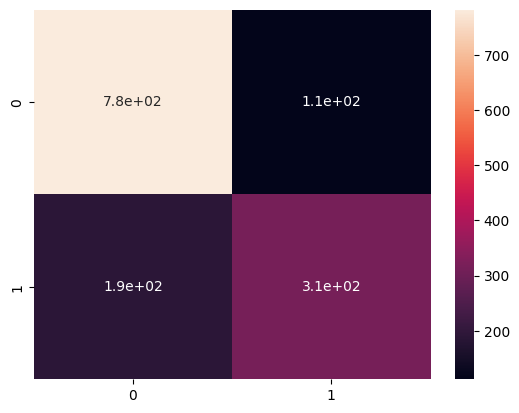

In [ ]:
import seaborn as sns

# show confusion matrix
sns.heatmap(confusion_matrix(y_test,y_pred), annot=True)

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.base import TransformerMixin

# Contoh DataFrame
data = {
    'color': ['red', 'blue', 'green', 'blue', 'red'],
    'size': ['S', 'M', 'L', 'M', 'S'],
    'weight': [1.2, 2.3, 3.1, 2.4, 1.8],
    'price': [100, 200, None, 150, 130],  # Mengandung missing value
    'target': [1, 0, 1, 0, 1]  # Kolom target
}
df = pd.DataFrame(data)

# Label Encoder untuk kolom ordinal 'size'
class OrdinalEncoderTransformer(TransformerMixin):
    def __init__(self):
        self.encoder = LabelEncoder()
        self.column = None

    def fit(self, X, y=None):
        self.encoder.fit(X)
        return self

    def transform(self, X, y=None):
        return self.encoder.transform(X).reshape(-1, 1)

    def get_feature_names_out(self, input_features=None):
        return input_features if input_features is not None else [self.column]

# Menentukan fitur numerik dan kategori
numeric_features = ['weight', 'price']
categorical_features = ['color']
ordinal_features = ['size']

# Preprocessing untuk fitur numerik (imputasi dan standardisasi)
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

# Preprocessing untuk fitur kategori (One-Hot Encoding)
categorical_transformer = Pipeline(steps=[
    ('encoder', OneHotEncoder(drop='first', sparse_output=False))
])

# Preprocessing untuk fitur ordinal (Label Encoding)
ordinal_transformer = Pipeline(steps=[
    ('label_encoder', OrdinalEncoderTransformer())
])

# Menggabungkan preprocessing untuk numerik, kategori, dan ordinal
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features),
        ('ord', ordinal_transformer, ordinal_features)
    ])

# Memisahkan fitur dan target
X = df.drop('target', axis=1)
y = df['target']

# Membagi data menjadi training dan testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Membangun pipeline dengan preprocessing dan model (Logistic Regression)
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression())
])

# Melatih model
model.fit(X_train, y_train)

# Prediksi pada data testing
y_pred = model.predict(X_test)

print("Prediksi:", y_pred)

# Menggabungkan hasil preprocessing dengan data asli untuk analisis lebih lanjut
X_train_transformed = model.named_steps['preprocessor'].transform(X_train)
final_train_df = pd.DataFrame(X_train_transformed, columns=preprocessor.get_feature_names_out())
final_train_df['target'] = y_train.values

print("\nDataFrame Gabungan setelah Preprocessing:")
print(final_train_df)


Prediksi: [0]

DataFrame Gabungan setelah Preprocessing:
   num__weight  num__price  cat__color_green  cat__color_red  ord__size  \
0    -0.461062    0.187317               0.0             1.0        2.0   
1     1.383187    0.000000               1.0             0.0        0.0   
2    -1.312255   -1.498537               0.0             1.0        2.0   
3     0.390130    1.311220               0.0             0.0        1.0   

   target  
0       1  
1       1  
2       1  
3       0  


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:99: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was 

In [ ]:
print(X_train)
print(y_train)

   color size  weight  price
4    red    S     1.8  130.0
2  green    L     3.1    NaN
0    red    S     1.2  100.0
3   blue    M     2.4  150.0
4    1
2    1
0    1
3    0
Name: target, dtype: int64
